### Лабораторная работа №1 (вариант 10)

# Построение датчиков БСВ

### 1. Мультипликативно-конгруентный датчик

In [1]:
a = 16807
b = 16807
m = 2**31

In [2]:
class Generator1:
    def __init__(self, a, b, m):
        self.base = a
        self.a = a
        self.b = b
        self.m = m
        
    def rand(self):
        self.a = (self.a * self.b) % self.m
        return self.a / self.m
    
    def reset(self):
        self.a = self.base
        return self
    
    def get_period(self):
        period = 0
        while(period <= self.m):
            self.rand()
            period += 1
            if(self.a == self.base):
                return(period)
        return -1

In [3]:
list1 = []
gen1 = Generator1(a, b, m)

for i in range(0, 1000):
    list1.append(gen1.rand())
    if(i < 10):
        print(list1[i])

0.1315377880819142
0.7556042927317321
0.44134794222190976
0.7348649236373603
0.8747715731151402
0.2858293461613357
0.9338209335692227
0.7284304979257286
0.7313786377198994
0.2807641583494842


In [4]:
# Определим период построенного датчика

#print("T = " + str(gen1.get_period()))

# T = 268434456 

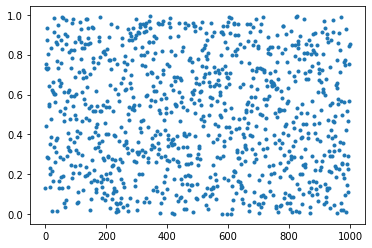

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(0, 1000)], list1, '.')

### 2. Датчик на основе нелинейных реккурентных формул

In [6]:
a = 16807
b = 16807
c = 37
g = 10
m = 2**31

In [7]:
# Период такого датчика будет равен M=2^31

In [8]:
class Generator2:
    def __init__(self, a, b, c, g, m):
        self.base = a
        self.a = a
        self.b = b
        self.c = c
        self.g = g
        self.m = m
        
    def reset(self):
        self.a = self.base
        return self
        
    def rand(self):
        self.a = (g * self.a * self.a + self.a * self.b + self.c) % self.m
        return self.a / self.m

In [9]:
list2 = []
gen2 = Generator2(a, b, c, g, m)

for i in range(0, 1000):
    list2.append(gen2.rand())
    if(i < 10):
        print(list2[i])

0.4469156861305237
0.060548263136297464
0.4807263920083642
0.27407721942290664
0.45434522442519665
0.8374517154879868
0.06728929933160543
0.0897158901207149
0.3819110207259655
0.37396890530362725


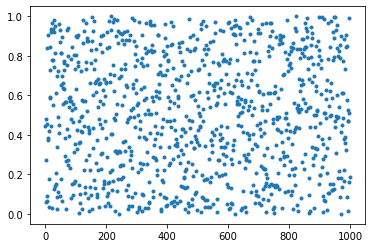

In [10]:
plt.plot([i for i in range(0, 1000)], list2, '.')

### 3. Датчик Маклорена-Марсальи (на основе двух предыдущих)

In [11]:
import math

In [12]:
k = 64

In [13]:
class Generator3:
    def __init__(self, k, gen1, gen2):
        self.k = k
        self.gen1 = gen1
        self.gen2 = gen2
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
            
    def reset(self):
        self.gen1.reset()
        self.gen2.reset()
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
        return self
        
    def rand(self):
        index = math.floor(self.gen2.rand() * self.k)
        value = self.v[index]
        self.v[index] = self.gen1.rand()
        return value

In [14]:
list3 = []
gen3 = Generator3(k, gen1.reset(), gen2.reset())

for i in range(0, 1000):
    list3.append(gen3.rand())
    if(i < 10):
        print(list3[i])

0.914796479512006
0.7348649236373603
0.33447730587795377
0.34988268790766597
0.984431158285588
0.18687627790495753
0.8747715731151402
0.2858293461613357
0.6633048285730183
0.6216257098130882


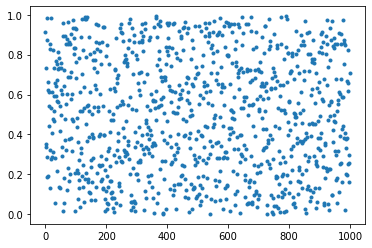

In [15]:
plt.plot([i for i in range(0, 1000)], list3, '.')

# Лабораторная работа №3

In [16]:
import math
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [17]:
n = 10000

### Расчет матожидания и дисперсии по выборке

In [18]:
def get_expectation(val):
    e_obs = 0
    
    for x in val:
        e_obs += x
        
    e_obs /= len(val)
    return e_obs

In [19]:
def get_dispersion(val):
    d = 0
    mean = 0
    
    for x in val:
        mean += x
    mean /= len(val)
    
    for x in val:
        d += (x - mean)**2
    d /= (len(val) - 1)
    
    return d

### Расчет эталонных и выборочных частот попадания в области гистограммы

In [20]:
# считаем ожидаемые частоты попадания в каждую область гистограммы

def exp_frec(min_lim, max_lim, F, step=1):
    frec_exp = []

    frec_exp.append(n * F(min_lim))
    
    for i in np.arange(min_lim, max_lim, step):
        frec_exp.append(n * (F(i+step) - F(i)))
        
    frec_exp.append(n * (1 - F(max_lim)))
    
    return frec_exp

In [21]:
# считаем выборочные частоты попадания в каждую область гистограммы

def obs_frec(min_lim, max_lim, val_obs, step=1):
    shift = 0 - min_lim    
    frec_obs = []
    
    for i in np.arange(min_lim, max_lim + 2*step, step):
        frec_obs.append(0)
    
    val_sorted = sorted(val_obs)

    for val in val_sorted:
        if(val < min_lim):
            frec_obs[0] += 1
        elif(val > max_lim):
            frec_obs[-1] += 1
        else:
            frec_obs[math.floor(val/step) + shift + 1] += 1
        
    return frec_obs

### Построение графика для плотности распределения выборки

In [22]:
# строим график плотности распределения

def plot_distrib(min_lim, max_lim, frec_exp, frec_obs, step=1):
    X_val = np.arange(min_lim, max_lim, step)
    X, Ye, Yo = numpy.array(X_val), numpy.array(frec_exp[1:-1]), numpy.array(frec_obs[1:-1])
    
    fig = plt.figure(figsize = [18, 8])

    plt.plot(X, Ye, 'go')
    plt.plot(X, Ye, 'g-', label = 'expected')
    plt.plot(X, Yo, 'ro')
    plt.plot(X, Yo, 'r-', label = 'observed')
    plt.legend()
    plt.show()

### Хи-квадрат критерий

In [23]:
def chisquare(frec_obs, frec_exp):
    
    chisquare = 0.0
    for i in range(len(frec_obs)):
        if(frec_exp[i] != 0):   
            chisquare += ((frec_obs[i] - frec_exp[i])**2 / frec_exp[i])
        
    return chisquare

In [24]:
# Проверка вероятности ошибки первого рода

def get_error_prob(gen_normal, F_normal, min_lim, max_lim, treshhold, step=1, nruns = 1000):
    errors = 0
    
    for counter in range(nruns):
        val_normal = list()

        for i in range(n):
            val_normal.append(gen_normal())
        
        frec_exp_normal = exp_frec(min_lim, max_lim, F_normal, step)
        frec_obs_normal = obs_frec(min_lim, max_lim, val_normal, step)
        
        if(chisquare(frec_obs_normal, frec_exp_normal) > treshhold):
            errors += 1
            
    return errors / nruns

### Реализация критерия согласия Колмогорова

In [25]:
import numpy

def kolm(val_obs, F):
    val_sorted = sorted(val_obs)
    sup_d = 0
    for i in range(1, len(val_sorted)):
        f1 = i
        f2 = (i + 1)
        f3 = F(val_sorted[i]) * len(val_sorted)
        d = max(abs(f1 - f3), abs(f2 - f3))
        if(d > sup_d):
            sup_d = d
            
    return sup_d / len(val_sorted)

In [26]:
#critical value of D for n elements

def crit(n):
    return 1.22 / np.sqrt(n)

### Вспомогательные функции

In [27]:
def check_kolm(val_obs, F, n=10000):
    treshhold_kolm = crit(n)

    print("D_kolm = " + format(kolm(val_obs, F), '.4f'))
    print("D_crit = " + format(treshhold_kolm, '.4f'))

In [28]:
def check_moments(val_obs, e_exp1, d_exp1):
    e_obs1 = get_expectation(val_obs)
    d_obs1 = get_dispersion(val_obs)
    
    print('E_expected = ' + format(e_exp1, '.2f'))
    print('E_observed = ' + format(e_obs1, '.2f'))
    print('-----------------------------------')
    print('D_expected = ' + format(d_exp1, '.2f'))
    print('D_observed = ' + format(d_obs1, '.2f'))

# Нормальное распределение (m = -5, s^2 = 25)

In [29]:
m = -5
s2 = 25

In [30]:
def gen_normal(m=-5, s2=25):
    a1 = gen3.rand()
    a2 = gen3.rand()
    p = math.sqrt(-2 * math.log(a1)) * math.cos(2 * math.pi * a2)
    
    return m + math.sqrt(s2) * p

In [31]:
def F_normal(x):
    m = -5
    s2 = 25
    exp = lambda z: np.exp(-1 * (z - m)**2 / (2 * s2))
    return (1/(math.sqrt(2*math.pi*s2))) * integrate.quad(exp, -np.inf, x)[0]

In [32]:
val_normal = list()

for i in range(n):
    val_normal.append(gen_normal(m, s2))

#### Матожидание и дисперсия

In [33]:
e_exp1 = m
d_exp1 = s2

check_moments(val_normal, e_exp1, d_exp1)

E_expected = -5.00
E_observed = -4.94
-----------------------------------
D_expected = 25.00
D_observed = 24.96


#### Проверка критерия Колмогорова

In [34]:
check_kolm(val_normal, F_normal)

D_kolm = 0.0066
D_crit = 0.0122


#### График плотности распределения

In [35]:
min_lim = -20
max_lim = 10

In [36]:
frec_exp_normal = exp_frec(min_lim, max_lim, F_normal)
frec_obs_normal = obs_frec(min_lim, max_lim, val_normal)

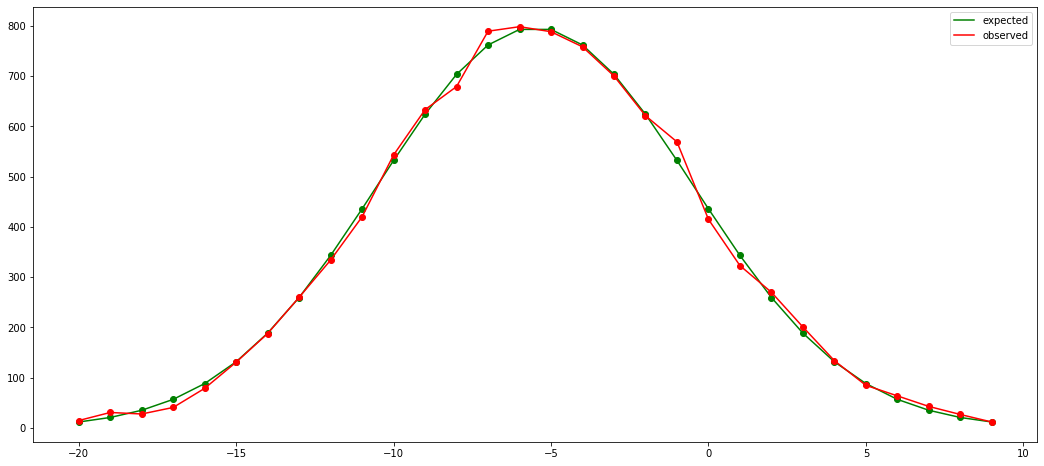

In [37]:
plot_distrib(min_lim, max_lim, frec_exp_normal, frec_obs_normal)

#### Проверка хи-квадрат критерия

In [38]:
print("Количество степеней свободы: " + str(len(frec_obs_normal) - 1))

Количество степеней свободы: 31


In [39]:
treshhold_value_31 = 44.993

print("Chisquare = " + format(chisquare(frec_obs_normal, frec_exp_normal), '.3f'))
print("Treshhold = " + format(treshhold_value_31, '.3f'))

Chisquare = 27.279
Treshhold = 44.993


In [40]:
print("Вероятность ошибки I рода P = " + format(get_error_prob(gen_normal, F_normal, min_lim, max_lim, treshhold_value_31), '.3f'))

Вероятность ошибки I рода P = 0.043


# Распределение Лапласа (a = 1)

In [41]:
al = 1

In [42]:
def gen_laplas(a=1):
    y = gen3.rand()
    
    if(y < 0.5):
        return (1/a) * math.log(2*y)
    else:
        return (-1/a) * math.log(2*(1-y))

In [43]:
def F_laplas(x):
    a = 1
    
    if(x < 0):
        return np.exp(a*x) / 2
    else:
        return 1 - np.exp(-1*a*x) / 2

In [44]:
val_laplas = list()

for i in range(n):
    val_laplas.append(gen_laplas(al))

#### Матожидание и дисперсия

In [45]:
e_exp2 = 0
d_exp2 = 2 / al**2

check_moments(val_laplas, e_exp2, d_exp2)

E_expected = 0.00
E_observed = -0.00
-----------------------------------
D_expected = 2.00
D_observed = 1.90


#### Проверка критерия Колмогорова

In [46]:
check_kolm(val_laplas, F_laplas)

D_kolm = 0.0058
D_crit = 0.0122


#### График плотности распределения

In [47]:
min_lim = -8
max_lim = 8

In [48]:
frec_exp_laplas = exp_frec(min_lim, max_lim, F_laplas)
frec_obs_laplas = obs_frec(min_lim, max_lim, val_laplas)

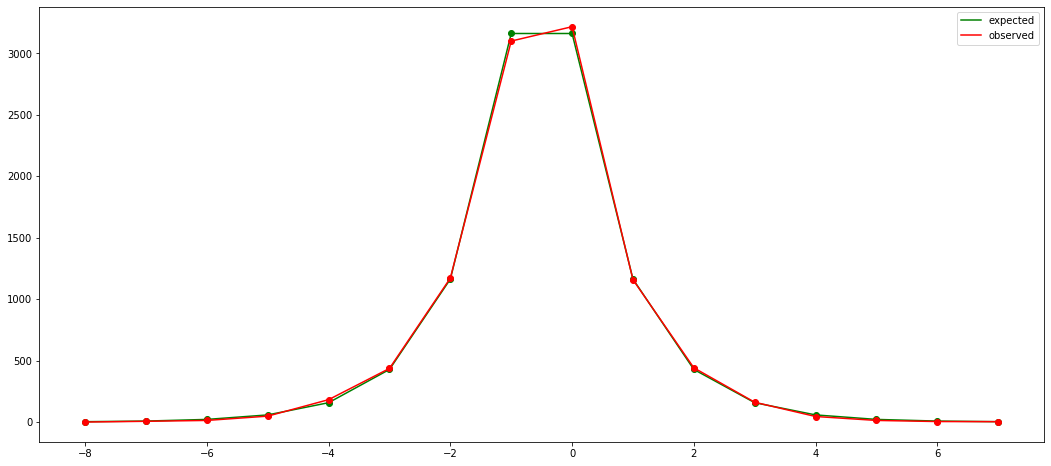

In [49]:
plot_distrib(min_lim, max_lim, frec_exp_laplas, frec_obs_laplas)

#### Проверка хи-квадрат критерия

In [50]:
print("Количество степеней свободы: " + str(len(frec_obs_laplas) - 1))

Количество степеней свободы: 17


In [51]:
treshhold_value_17 = 27.591

print("Chisquare = " + format(chisquare(frec_obs_laplas, frec_exp_laplas), '.3f'))
print("Treshhold = " + format(treshhold_value_17, '.3f'))

Chisquare = 23.103
Treshhold = 27.591


In [52]:
print("Вероятность ошибки I рода P = " + format(get_error_prob(gen_laplas, F_laplas, min_lim, max_lim, treshhold_value_17), '.3f'))

Вероятность ошибки I рода P = 0.048


# Экспоненциальное распределение (a = 4)

In [53]:
ag = 4

In [54]:
def gen_geom(a=4):
    y = gen3.rand()
    return (-1/a) * math.log(y)

In [55]:
def F_geom(x):
    a = 4
    return 1 - np.exp(-1*a*x)

In [56]:
val_geom = list()

for i in range(n):
    val_geom.append(gen_geom(ag))

#### Матожидание и дисперсия

In [57]:
e_exp3 = 1 / ag
d_exp3 = 1 / ag**2

check_moments(val_geom, e_exp3, d_exp3)

E_expected = 0.25
E_observed = 0.25
-----------------------------------
D_expected = 0.06
D_observed = 0.07


#### Проверка критерия Колмогорова

In [58]:
check_kolm(val_geom, F_geom)

D_kolm = 0.0119
D_crit = 0.0122


#### График плотности распределения

In [59]:
min_lim = 0
max_lim = 2
step = 0.1

In [60]:
frec_exp_geom = exp_frec(min_lim, max_lim, F_geom, step)
frec_obs_geom = obs_frec(min_lim, max_lim, val_geom, step)

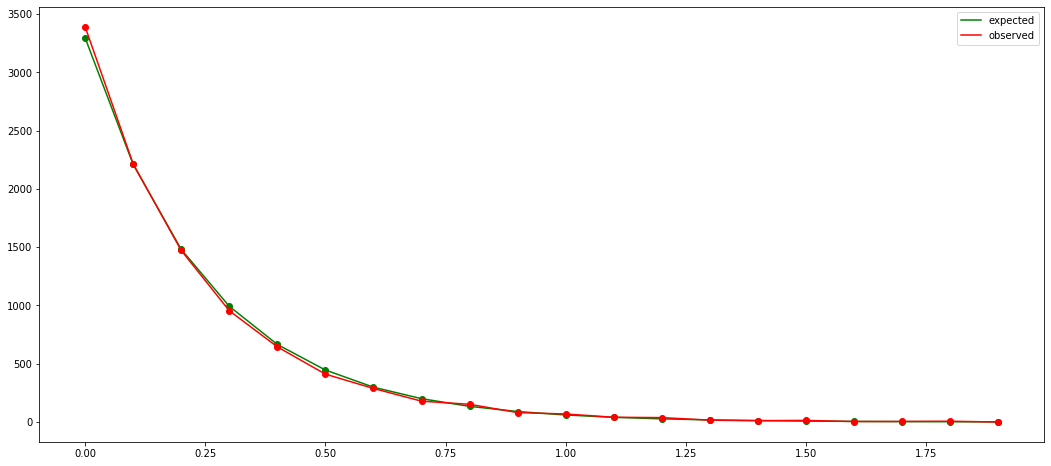

In [61]:
plot_distrib(min_lim, max_lim, frec_exp_geom, frec_obs_geom, step)

#### Проверка хи-квадрат критерия

In [62]:
print("Количество степеней свободы: " + str(len(frec_obs_geom) - 1))

Количество степеней свободы: 21


In [63]:
treshhold_value_21 = 32.675

print("Chisquare = " + format(chisquare(frec_obs_geom, frec_exp_geom), '.3f'))
print("Treshhold = " + format(treshhold_value_21, '.3f'))

Chisquare = 34.654
Treshhold = 32.675


In [64]:
print("Вероятность ошибки I рода P = " + format(get_error_prob(gen_geom, F_geom, min_lim, max_lim, treshhold_value_21, step), '.3f'))

Вероятность ошибки I рода P = 0.042


# Хи-квадрат распределение (m = 4)

In [65]:
mc = 4

In [66]:
def gen_chi(m=4):
    sumx = 0
    
    for i in range(m):
        a1 = gen3.rand()
        a2 = gen3.rand()
        p_norm = math.sqrt(-2 * math.log(a1)) * math.cos(2 * math.pi * a2)
        sumx += p_norm**2
        
    return sumx

In [67]:
def F_chi(x):
    m = 4
    p = lambda z: (z * np.exp(-1*z/2)) / 4 
    
    return integrate.quad(p, 0, x)[0]

In [68]:
val_chi = list()

for i in range(n):
    val_chi.append(gen_chi(mc))

#### Матожидание и дисперсия

In [69]:
e_exp4 = mc
d_exp4 = 2*mc

check_moments(val_chi, e_exp4, d_exp4)

E_expected = 4.00
E_observed = 4.01
-----------------------------------
D_expected = 8.00
D_observed = 7.87


#### Проверка критерия Колмогорова

In [70]:
check_kolm(val_chi, F_chi)

D_kolm = 0.0099
D_crit = 0.0122


#### График плотности распределения

In [71]:
min_lim = 0
max_lim = 10
step = 0.5

In [72]:
frec_exp_chi = exp_frec(min_lim, max_lim, F_chi, step)
frec_obs_chi = obs_frec(min_lim, max_lim, val_chi, step)

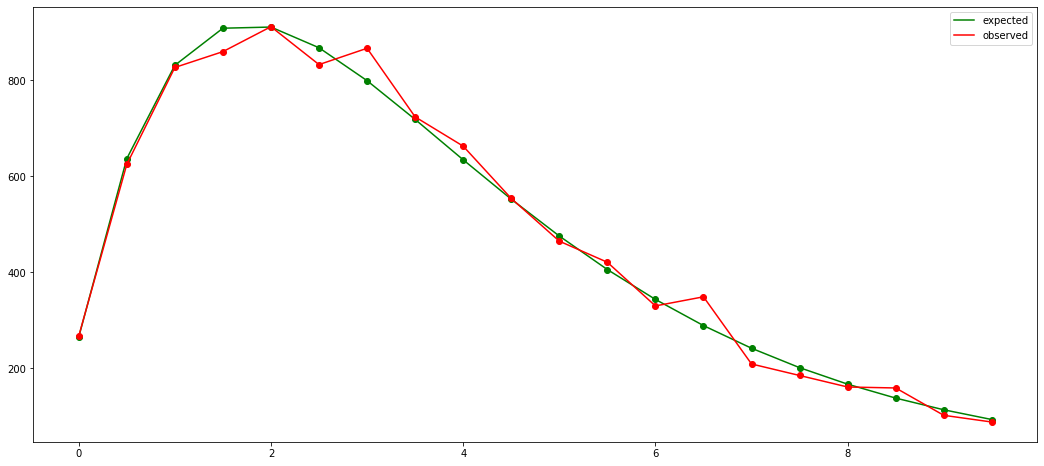

In [73]:
plot_distrib(min_lim, max_lim, frec_exp_chi, frec_obs_chi, step)

#### Проверка хи-квадрат критерия

In [74]:
print("Количество степеней свободы: " + str(len(frec_obs_chi) - 1))

Количество степеней свободы: 21


In [75]:
treshhold_value_21 = 32.675

print("Chisquare = " + format(chisquare(frec_obs_chi, frec_exp_chi), '.3f'))
print("Treshhold = " + format(treshhold_value_21, '.3f'))

Chisquare = 35.864
Treshhold = 32.675


In [76]:
print("Вероятность ошибки I рода P = " + format(get_error_prob(gen_chi, F_chi, min_lim, max_lim, treshhold_value_21, step), '.3f'))

Вероятность ошибки I рода P = 0.051


# Распределение Фишера (l = 5, m = 4)

In [77]:
lf = 5
mf = 4

In [78]:
def gen_fish(l=5, m=4):
    f1 = gen_chi(l)
    f2 = gen_chi(m)
        
    return (f1 / l)/(f2 / m)

In [79]:
def F_fish(x):
    l = 5
    m = 4
    p = lambda z: ((35/4) * (5/4)**(5/2) * z**(3/2)) / ((5/4)*z + 1)**(9/2)
    
    return integrate.quad(p, 0, x)[0]

In [80]:
val_fish = list()

for i in range(n):
    val_fish.append(gen_fish(lf, mf))

#### Матожидание и дисперсия

In [81]:
e_exp5 = mf / (mf -2)
e_obs5 = get_expectation(val_fish)
    
print('E_expected = ' + format(e_exp5, '.2f'))
print('E_observed = ' + format(e_obs5, '.2f'))

E_expected = 2.00
E_observed = 1.99


#### Проверка критерия Колмогорова

In [82]:
check_kolm(val_fish, F_fish)

D_kolm = 0.0150
D_crit = 0.0122


#### График плотности распределения

In [83]:
min_lim = 0
max_lim = 10
step = 0.5

In [84]:
frec_exp_fish = exp_frec(min_lim, max_lim, F_fish, step)
frec_obs_fish = obs_frec(min_lim, max_lim, val_fish, step)

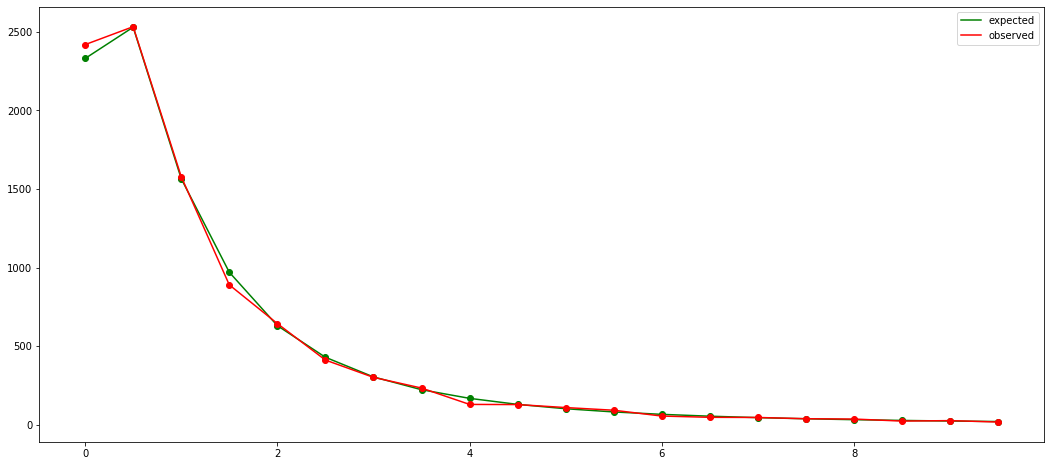

In [85]:
plot_distrib(min_lim, max_lim, frec_exp_fish, frec_obs_fish, step)

#### Проверка хи-квадрат критерия

In [86]:
print("Количество степеней свободы: " + str(len(frec_obs_fish) - 1))

Количество степеней свободы: 21


In [87]:
treshhold_value_21 = 32.675

print("Chisquare = " + format(chisquare(frec_obs_fish, frec_exp_fish), '.3f'))
print("Treshhold = " + format(treshhold_value_21, '.3f'))

Chisquare = 27.620
Treshhold = 32.675


In [88]:
print("Вероятность ошибки I рода P = " + format(get_error_prob(gen_fish, F_fish, min_lim, max_lim, treshhold_value_21, step, 500), '.3f'))

Вероятность ошибки I рода P = 0.028


# Применение неподходящих критериев

## Хи-квадрат критерий для экспоненциального распределения применим к хи-квадрат распределению 

In [89]:
treshhold_value_21 = 32.675

print("Chisquare = " + format(chisquare(frec_obs_chi, frec_exp_geom), '.3f'))
print("Treshhold = " + format(treshhold_value_21, '.3f'))

Chisquare = 100452.340
Treshhold = 32.675


## Критерий Колмогорова для нормального распределения применим к распределению Лапласа

In [90]:
check_kolm(val_laplas, F_normal)

D_kolm = 0.6580
D_crit = 0.0122
